# Parametric model of plate with multiple holes

### Objective:
In this example we'll setup a parametric model in PyMAPDL for a rectangular plate with multiple holes. The model is setup such that one can change the dimensions of the plate, the number of holes and their radius, the material properties and the pressure applied.

The learning objectives of this demo are:
* Launch PyMAPDL on a local machine
* Setup and solve a parametric model using PyMAPDL
* Interactive plotting of CAD, mesh, and results in Pythonic interface.

#### Model parameters:
* Length, width and depth of the plate
* Number of holes
* Raidus of the holes
* Material properties (Young's modulus and Poisson's ratio)
* Applied pressure
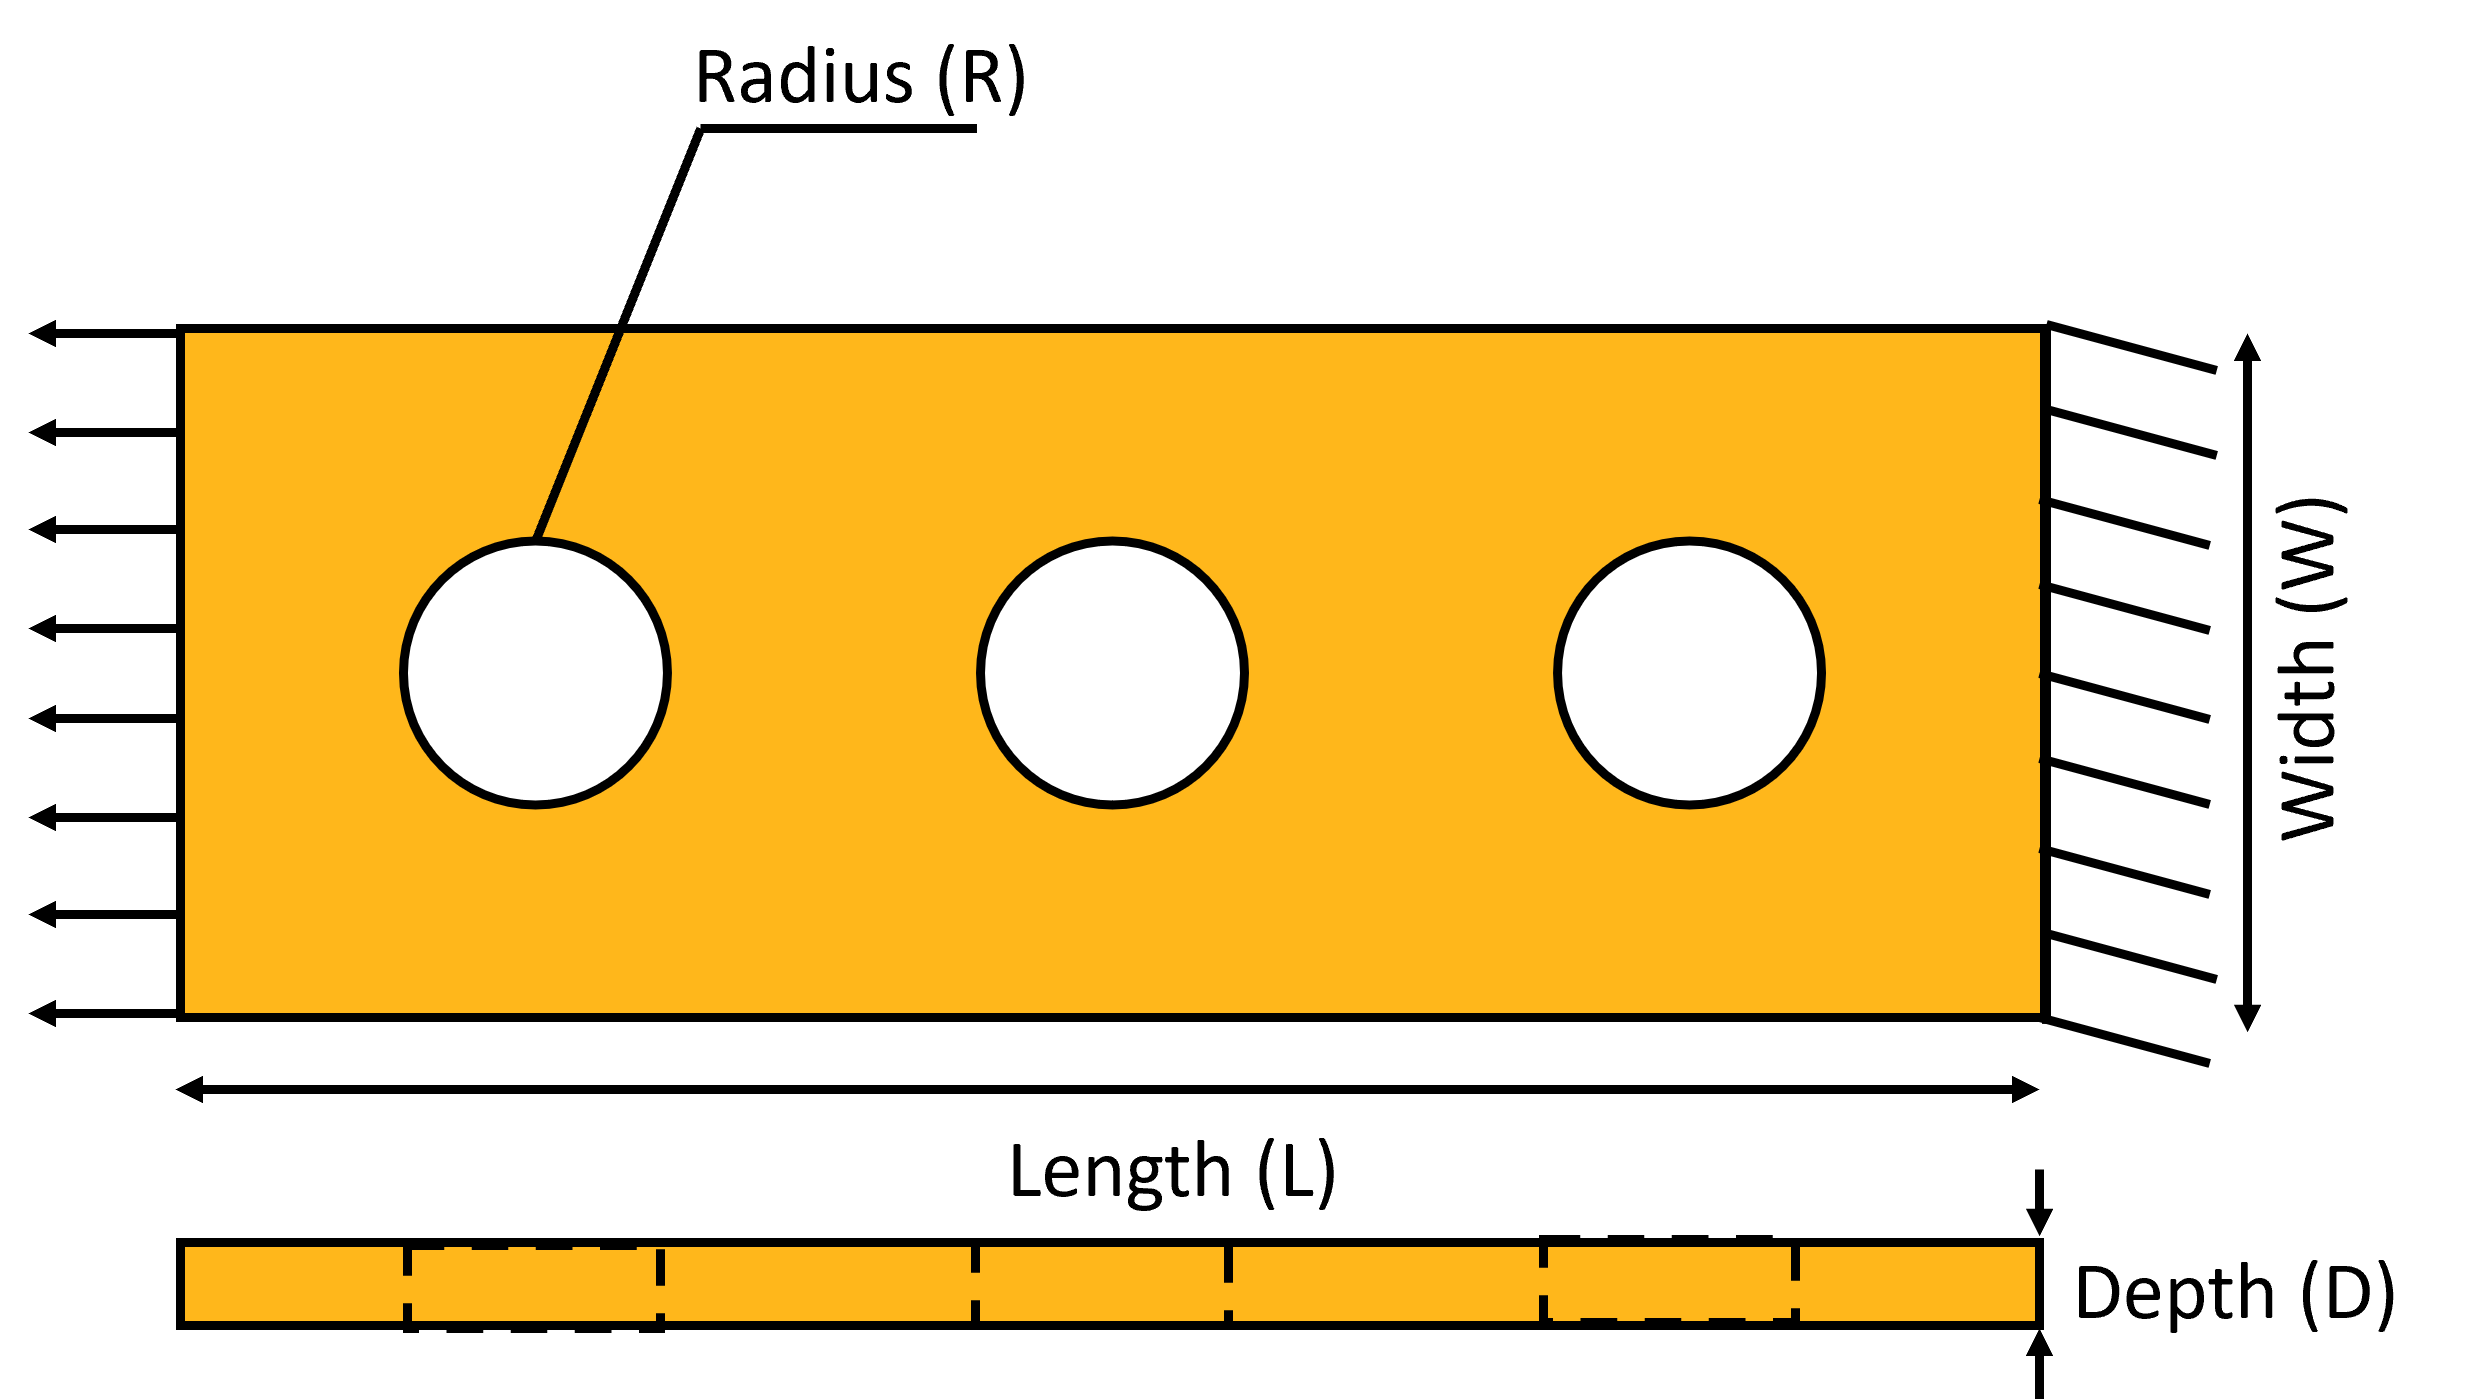

#### Make imports

In [ ]:
# For core functionality
from ansys.mapdl.core import launch_mapdl

# For quite exiting on error
from commons import StopExecution

# To mute annoying warnings in notebook
import warnings

warnings.filterwarnings("ignore")

## Step 1 - define all parameters

In [ ]:
# All units in (m, Kg, s)
# Plate parameters
LENGTH = 5
WIDTH = 2.5
DEPTH = 0.1

# Hole parameter
RADIUS = 0.5
NUM = 3

# Material parameter
E = 2e11
NU = 0.27

# Load parameter
PRESSURE = 1000

# Step 2 - launch MAPDL and create geometry

Run pyMAPDL

To stop current and subsequent cells quietly

In [ ]:
try:
    mapdl = launch_mapdl(nproc=2)

    mapdl.clear()

except Exception:
    print("No MAPDL found. Terminating...")

    raise StopExecution

Enter to the preprocessor

In [ ]:
mapdl.prep7()

Create a block volume based on working plane coordinates

In [ ]:
mapdl.block(0, LENGTH, 0, WIDTH, 0, DEPTH);

Create holes as volumes and substract them from plate volume

In [ ]:
for i in range(1, NUM + 1):
    # mapdl.cyl4(xcenter=i*LENGTH/(NUM+1), ycenter=WIDTH/2, rad1=RADIUS, theta1='', rad2='', theta2='', depth=2*DEPTH)
    mapdl.cyl4(i * LENGTH / (NUM + 1), WIDTH / 2, RADIUS, "", "", "", 2 * DEPTH)

mapdl.vsbv(1, "all")

Plot body

In [ ]:
mapdl.vplot("all");

## Step 3 - define material properties, mesh attributes and generate mesh.

Specifies the divisions and spacing ratio on unmeshed lines

In [ ]:
mapdl.lesize("ALL", 0.15, layer1=1)

Defines a linear material property as a constant or a function of temperature

In [ ]:
mapdl.mp("ex", 1, E)
mapdl.mp("nuxy", 1, NU)

Set element type

In [ ]:
mapdl.et(1, "SOLID186")

For elements that support multiple shapes, specifies the element shape

In [ ]:
mapdl.mshape(1, "3D")

Specifies whether free meshing or mapped meshing should be used to mesh

In [ ]:
mapdl.mshkey(0)

Generates nodes and volume elements within volumes

In [ ]:
mapdl.vmesh("all")

Plot the currently selected elements

In [ ]:
mapdl.eplot();

## Step 4 - apply loads and boundary conditions

Select nodes by X location

In [ ]:
mapdl.nsel("s", "loc", "x", 0)

Define degree-of-freedom constraints at selected nodes - all fixed

In [ ]:
mapdl.d("all", "all", 0)

Select nodes by X location

In [ ]:
mapdl.nsel("s", "loc", "x", LENGTH)

Apply pressure to selected nodes

In [ ]:
mapdl.sf("all", "pres", PRESSURE)

Reselect all entities

In [ ]:
mapdl.allsel()

In [ ]:
mapdl.eplot(plot_bc=True, plot_bc_legend=True)

Exit normally from a processor

In [ ]:
mapdl.finish()

## Step 4 - solve the static problem

Enter the solution processor

In [ ]:
mapdl.slashsolu()

Start a solution

In [ ]:
mapdl.solve()

Exit normally from a processor

In [ ]:
mapdl.finish()

Show solution output

In [ ]:
# Enter the solver routine and solve
mapdl.slashsolu()

# Get output
output = mapdl.solve()

# Print output
print(output)

## Step 5 - plot the stress contours for the model

Get results

In [ ]:
result = mapdl.result

Plot results

In [ ]:
result.plot_principal_nodal_stress(
    0, "seqv", background="w", show_edges=True, text_color="k", add_text=True
);

## Step 6 - exit MAPDL

In [ ]:
mapdl.exit()